In [156]:
import numpy as np
import matplotlib.pyplot as plt

lam = 1
mu = 1.1
n_server = 100
burn_in = n_server*10
T = 100000
B = [1,2,3,4,5]

total_events = np.random.poisson(n_server*(lam+mu)*T)
prob_arrival = n_server*lam/(1.0*n_server*(lam+mu))
queue = np.zeros(n_server)
frac_time_greater = np.zeros((n_server,len(B)))
queue_PO2 = np.zeros(n_server)
frac_time_greater_PO2 = np.zeros((n_server,len(B)))

for t in range(total_events):
    arrival = np.random.binomial(1,prob_arrival)
    if arrival:
        i = np.random.randint(0,n_server)
        
        i2_PO2 = np.random.choice(n_server, 2, replace = False)
        i_PO2 = i2_PO2[0] if queue_PO2[int(i2_PO2[0])]<queue_PO2[int(i2_PO2[1])] else i2_PO2[1] #i2_PO2[np.argmin(queue[i2_PO2])]
        queue_PO2[int(i_PO2)] +=1
        if t>burn_in:
            frac_time_greater_PO2[i_PO2,:] += (queue_PO2[i_PO2]>=B).astype(int) 

            
        queue[i] += 1
        if t>burn_in:
            frac_time_greater[i,:] += (queue[i]>=B).astype(int) 
            
            
    else:        
        departure = np.random.randint(0,n_server)
        indicator = queue[departure] >0
        queue[departure] -= int(indicator)
        queue_PO2[departure] -= int(queue_PO2[departure]>0)
        
        if t>burn_in:
            frac_time_greater[departure,:] += (queue[departure]>=B).astype(int)
            frac_time_greater_PO2[departure,:] += (queue_PO2[departure]>=B).astype(int)
        
frac_time_greater = frac_time_greater.sum(axis = 0)/(1.0*(total_events - burn_in))
frac_time_greater_PO2 = frac_time_greater_PO2.sum(axis = 0)/(1.0*(total_events - burn_in))

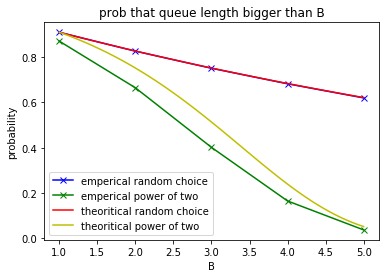

In [163]:
#compute the prob that qeuue length is more than B

plt.clf()

Bmin = np.min(B)
Bmax = np.max(B)
#time average
plt.plot(B,frac_time_greater, color = 'b',marker = 'x',label = 'emperical random choice')
plt.plot(B,frac_time_greater_PO2,color = 'g',marker = 'x',label = 'emperical power of two')
rho = lam/(1.0*mu)
plt.plot(np.linspace(Bmin,Bmax,100),rho**np.array(np.linspace(Bmin,Bmax,100)),color = 'r', label = 'theoritical random choice')
plt.plot(np.linspace(Bmin,Bmax,100),rho**(2**np.array(np.linspace(Bmin,Bmax,100))-1),color = 'y',label = 'theoritical power of two')
plt.xlabel('B')
plt.title('prob that queue length bigger than B')
plt.ylabel('probability')
plt.legend()
plt.show()